In [ ]:
!pip install imbalanced-learn matplotlib seaborn scikit-learn pandas numpy

In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

In [ ]:
# 2. Load Data & Remove Irrelevant Columns
df = pd.read_csv('2025_Sterling_Financial_Dataset_clean.csv')

# Drop ID, Date, and text feedback (not used for model)
cols_drop = ['date', 'customer_id', 'customer_feedback']
df_clean = df.drop(columns=[c for c in cols_drop if c in df.columns])

In [ ]:
# 3. Encode Categorical Variables
# Convert text (e.g., 'High Risk') to numbers
le = LabelEncoder()
for col in df_clean.select_dtypes(include=['object']).columns:
    df_clean[col] = le.fit_transform(df_clean[col])

In [ ]:
# 4. Train-Test Split (80/20)
target = 'default_history'
X = df_clean.drop(columns=[target])
y = df_clean[target]

# Stratify ensures the default rate is consistent in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# 5. Handle Imbalance using SMOTE
# Applied ONLY to Training Data to prevent data leakage
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Train size after SMOTE: {X_train_smote.shape}")

In [ ]:
# 6. Random Forest Model Training
rf_model = RandomForestClassifier(
    n_estimators=200,    # Number of trees
    max_depth=10,        # Prevent overfitting
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_smote, y_train_smote)

In [ ]:
# 7. Model Evaluation (Metrics)
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

print("Classification Report:\n")
print(classification_report(y_test, y_pred))
auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {auc:.4f}")

In [ ]:
Visualization: Confusion Matrix & Feature Importance
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix')
# Feature Importance
feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns).nlargest(8)
feat_imp.plot(kind='barh', ax=ax[1], color='teal')
ax[1].set_title('Top 8 Feature Importance')
plt.tight_layout()
plt.show()


Data preprocessing completed.

Original Train Distribution:
default_history
0    1126
1      74
Name: count, dtype: int64
Original Imbalance Ratio: 1:15.2

Train Distribution after SMOTE:
default_history
0    1126
1    1126
Name: count, dtype: int64

Training the model...
Model training completed.

=== Model Performance (Threshold = 0.3) ===
Recall :    0.5556  <-- 
Precision : 0.1587
F1-Score:          0.2469
Accuracy:          0.7967

Classification Report (Adjusted):
              precision    recall  f1-score   support

           0       0.97      0.81      0.88       282
           1       0.16      0.56      0.25        18

    accuracy                           0.80       300
   macro avg       0.56      0.68      0.56       300
weighted avg       0.92      0.80      0.84       300



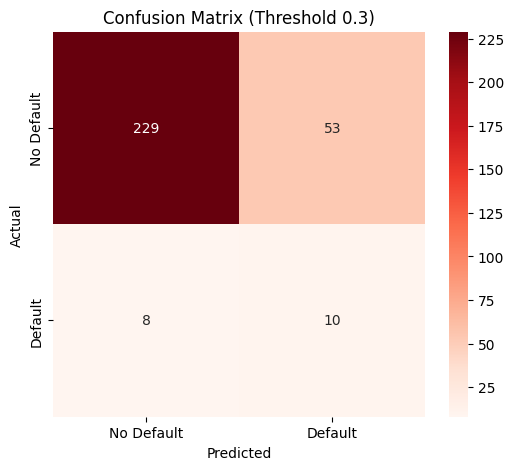

In [9]:
# ==========================================
# Step 1: Import Necessary Libraries
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Models and Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

# Library for Handling Imbalance (SMOTE)
from imblearn.over_sampling import SMOTE

# ==========================================
# Step 2: Load and Clean Data
# ==========================================
file_path = '2025_Sterling_Financial_Dataset_clean.csv'
df = pd.read_csv(file_path)
cols_to_drop = ['date', 'customer_id', 'customer_feedback', 'risk_category']
df_clean = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

# 2.2 Encode Categorical Variables
# Note: 'risk_category' is now an input feature and needs to be encoded
categorical_cols = df_clean.select_dtypes(include=['object']).columns
le = LabelEncoder()
label_mappings = {}

for col in categorical_cols:
    df_clean[col] = le.fit_transform(df_clean[col])
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

print("Data preprocessing completed.")

# ==========================================
# Step 3: Prepare Data & Handle Imbalance (SMOTE)
# ==========================================

# 3.1 Set Target Variable to 'default_history'
target_col = 'default_history'

X = df_clean.drop(columns=[target_col])
y = df_clean[target_col]

# 3.2 Split Train and Test Sets
# stratify=y ensures the proportion of defaults is consistent in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nOriginal Train Distribution:\n{y_train.value_counts()}")
print(f"Original Imbalance Ratio: 1:{y_train.value_counts()[0] / y_train.value_counts()[1]:.1f}")

# 3.3 Apply SMOTE to Handle Imbalance
# SMOTE synthesizes new default samples (1) to balance 0 and 1 in the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"\nTrain Distribution after SMOTE:\n{y_train_smote.value_counts()}")

# ==========================================
# Step 4: Random Forest Model Development
# ==========================================

# To capture the minority class, we can use class_weight='balanced' or rely on SMOTE
# Here we primarily rely on SMOTE
rf_model = RandomForestClassifier(
    n_estimators=200,      # Increase number of trees
    max_depth=10,          # Control depth to prevent overfitting
    min_samples_leaf=4,    # Minimum samples per leaf to increase generalization
    random_state=42,
    n_jobs=-1
)

print("\nTraining the model...")
rf_model.fit(X_train_smote, y_train_smote)
print("Model training completed.")

# ==========================================
# Step 5: Model Evaluation
# ==========================================

# ==========================================
# Part 7: Model Evaluation (With Threshold Tuning)
# ==========================================
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

# 1. 获取概率 (Probability) 而不是直接的 0/1 预测
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
custom_threshold = 0.3
y_pred_adjusted = (y_pred_proba >= custom_threshold).astype(int)
print(f"\n=== Model Performance (Threshold = {custom_threshold}) ===")
print(f"Recall :    {recall_score(y_test, y_pred_adjusted):.4f}  <-- ")
print(f"Precision : {precision_score(y_test, y_pred_adjusted):.4f}")
print(f"F1-Score:          {f1_score(y_test, y_pred_adjusted):.4f}")
print(f"Accuracy:          {accuracy_score(y_test, y_pred_adjusted):.4f}")

# 4. 显示详细报告
print("\nClassification Report (Adjusted):")
print(classification_report(y_test, y_pred_adjusted))

# 5. 重新画混淆矩阵 (使用新阈值)
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred_adjusted)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title(f'Confusion Matrix (Threshold {custom_threshold})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()









=== Feature Importance Table (Without risk_category) ===
            Feature  Importance
       credit_score    0.247895
      savings_ratio    0.118947
     debt_to_income    0.099481
        loan_amount    0.069715
 credit_utilization    0.066264
payment_punctuality    0.060512
           location    0.059324
             income    0.056944
    business_sector    0.051752
     feedback_topic    0.050005
          sentiment    0.042673
                age    0.040792
   customer_segment    0.035695


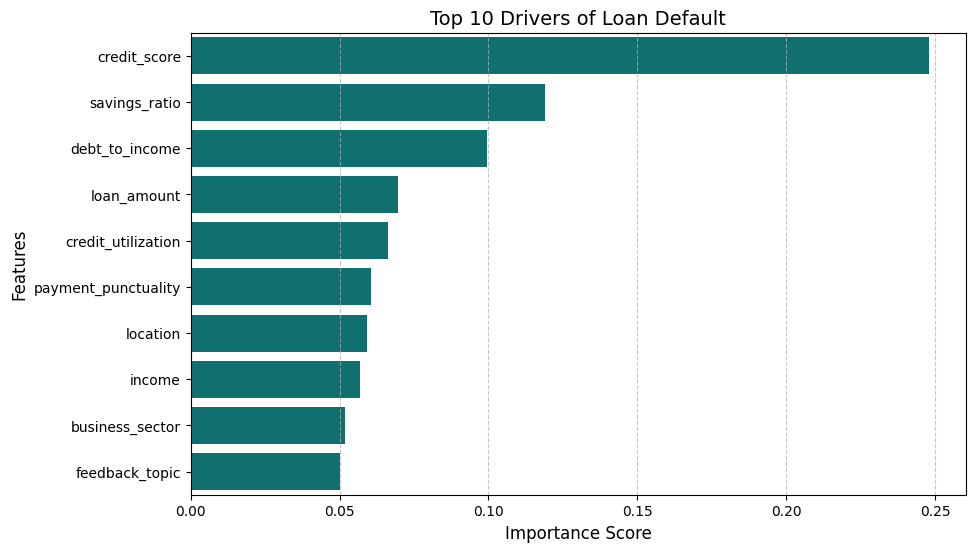

In [7]:
# ==========================================
# Feature Importance Visualization (Fixed)
# ==========================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 提取特征重要性
importances = rf_model.feature_importances_
feature_names = X.columns  # 确保这里的 X 是剔除了 risk_category 后的

# 2. 创建 DataFrame 并排序
feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

# 3. 打印文字表格
print("\n=== Feature Importance Table (Without risk_category) ===")
print(feature_imp_df.to_string(index=False))

# 4. 绘制柱状图 (修复了报错)
plt.figure(figsize=(10, 6))

# 修改点：把 palette='teal' 改为 color='teal' (统一颜色)
# 或者你可以用 palette='mako' (这是 seaborn 里类似青色的渐变调色板)
sns.barplot(x='Importance', y='Feature', data=feature_imp_df.head(10), color='teal')

plt.title('Top 10 Drivers of Loan Default', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

ROC-AUC Score: 0.7671


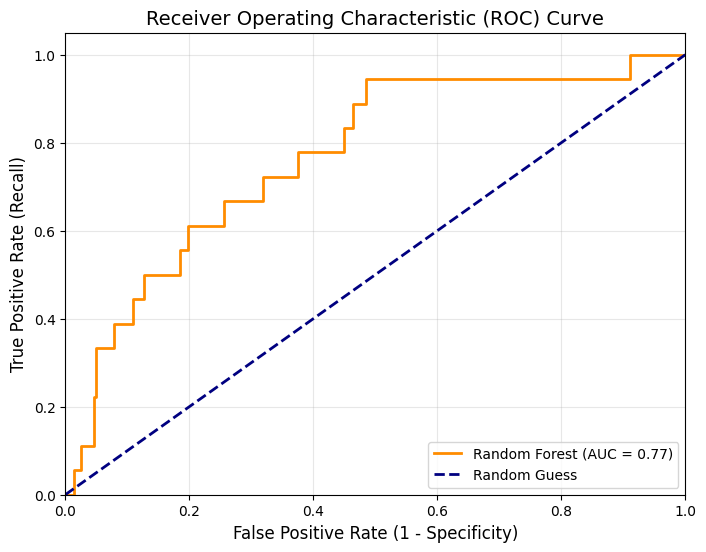

In [8]:
# ==========================================
# ROC-AUC Curve Visualization
# ==========================================
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# 1. 获取预测为"违约 (Class 1)"的概率
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# 2. 计算 AUC 分数
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {auc_score:.4f}")

# 3. 计算 ROC 曲线的坐标点
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 4. 绘图
plt.figure(figsize=(8, 6))

# 绘制 ROC 曲线 (使用深橙色)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Random Forest (AUC = {auc_score:.2f})')

# 绘制随机猜测的基准线 (虚线)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')

# 图表美化
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right")
plt.grid(alpha=0.3)

plt.show()